<a href="https://colab.research.google.com/github/MaiPri/techlabs_group_3_clownfishes/blob/main/Pareto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter # for Pareto Chart

In [19]:
df = pd.read_csv("charging_data.csv")

In [56]:
#create a new df with only the data I need
new2df = df.groupby("betreiber")["ladepunkte"].sum().sort_values(ascending=False).to_frame().copy()
new2df

,ladepunkte
betreiber,
E.ON Drive GmbH,2154
EnBW mobility+ AG und Co.KG,2006
EWE Go GmbH,894
Mercedes-Benz AG,825
Westenergie Metering GmbH,795
...,...
Fuka elevator parts,1
Fun Golf Bovenden,1
Förderverein Natura Miriquidica e.V.,1


In [80]:
#There are too many providers with just one charging station (2929 out of 4772). This distorts the results.
new2df.groupby('ladepunkte').value_counts()

ladepunkte
1       2969
2        626
3        248
4        147
5        101
        ... 
795        1
825        1
894        1
2006       1
2154       1
Length: 126, dtype: int64

In [60]:
#Create a new df without the providers with just one station
cleanOfOne_df = new2df.loc[new2df["ladepunkte"] >= 2].copy()
cleanOfOne_df

,ladepunkte
betreiber,
E.ON Drive GmbH,2154
EnBW mobility+ AG und Co.KG,2006
EWE Go GmbH,894
Mercedes-Benz AG,825
Westenergie Metering GmbH,795
...,...
Stadt Lübben (Spreewald),2
Autohaus Gitter e.Kfm.,2
Vogelmann Chemie GmbH,2


In [61]:
#calculate the cummulative percentage
cleanOfOne_df["cum_percentage"] = round(cleanOfOne_df["ladepunkte"].cumsum()/cleanOfOne_df["ladepunkte"].sum()*100,2)
cleanOfOne_df

,ladepunkte,cum_percentage
betreiber,,
E.ON Drive GmbH,2154,6.37
EnBW mobility+ AG und Co.KG,2006,12.31
EWE Go GmbH,894,14.95
Mercedes-Benz AG,825,17.39
Westenergie Metering GmbH,795,19.74
...,...,...
Stadt Lübben (Spreewald),2,99.98
Autohaus Gitter e.Kfm.,2,99.98
Vogelmann Chemie GmbH,2,99.99


In [66]:
#I want to know how many providers make out the 80%
clean_df = cleanOfOne_df.loc[cleanOfOne_df["cum_percentage"]<= 80.00]
clean_df

,ladepunkte,cum_percentage
betreiber,,
E.ON Drive GmbH,2154,6.37
EnBW mobility+ AG und Co.KG,2006,12.31
EWE Go GmbH,894,14.95
Mercedes-Benz AG,825,17.39
Westenergie Metering GmbH,795,19.74
...,...,...
Mercedes- Benz AG - Niederlassung Bremen,17,79.79
SWK ENERGIE GmbH,17,79.84
Stadtwerke Fürstenfeldbruck GmbH,17,79.89


Text(0, 0.5, 'Cumulative Percentage')

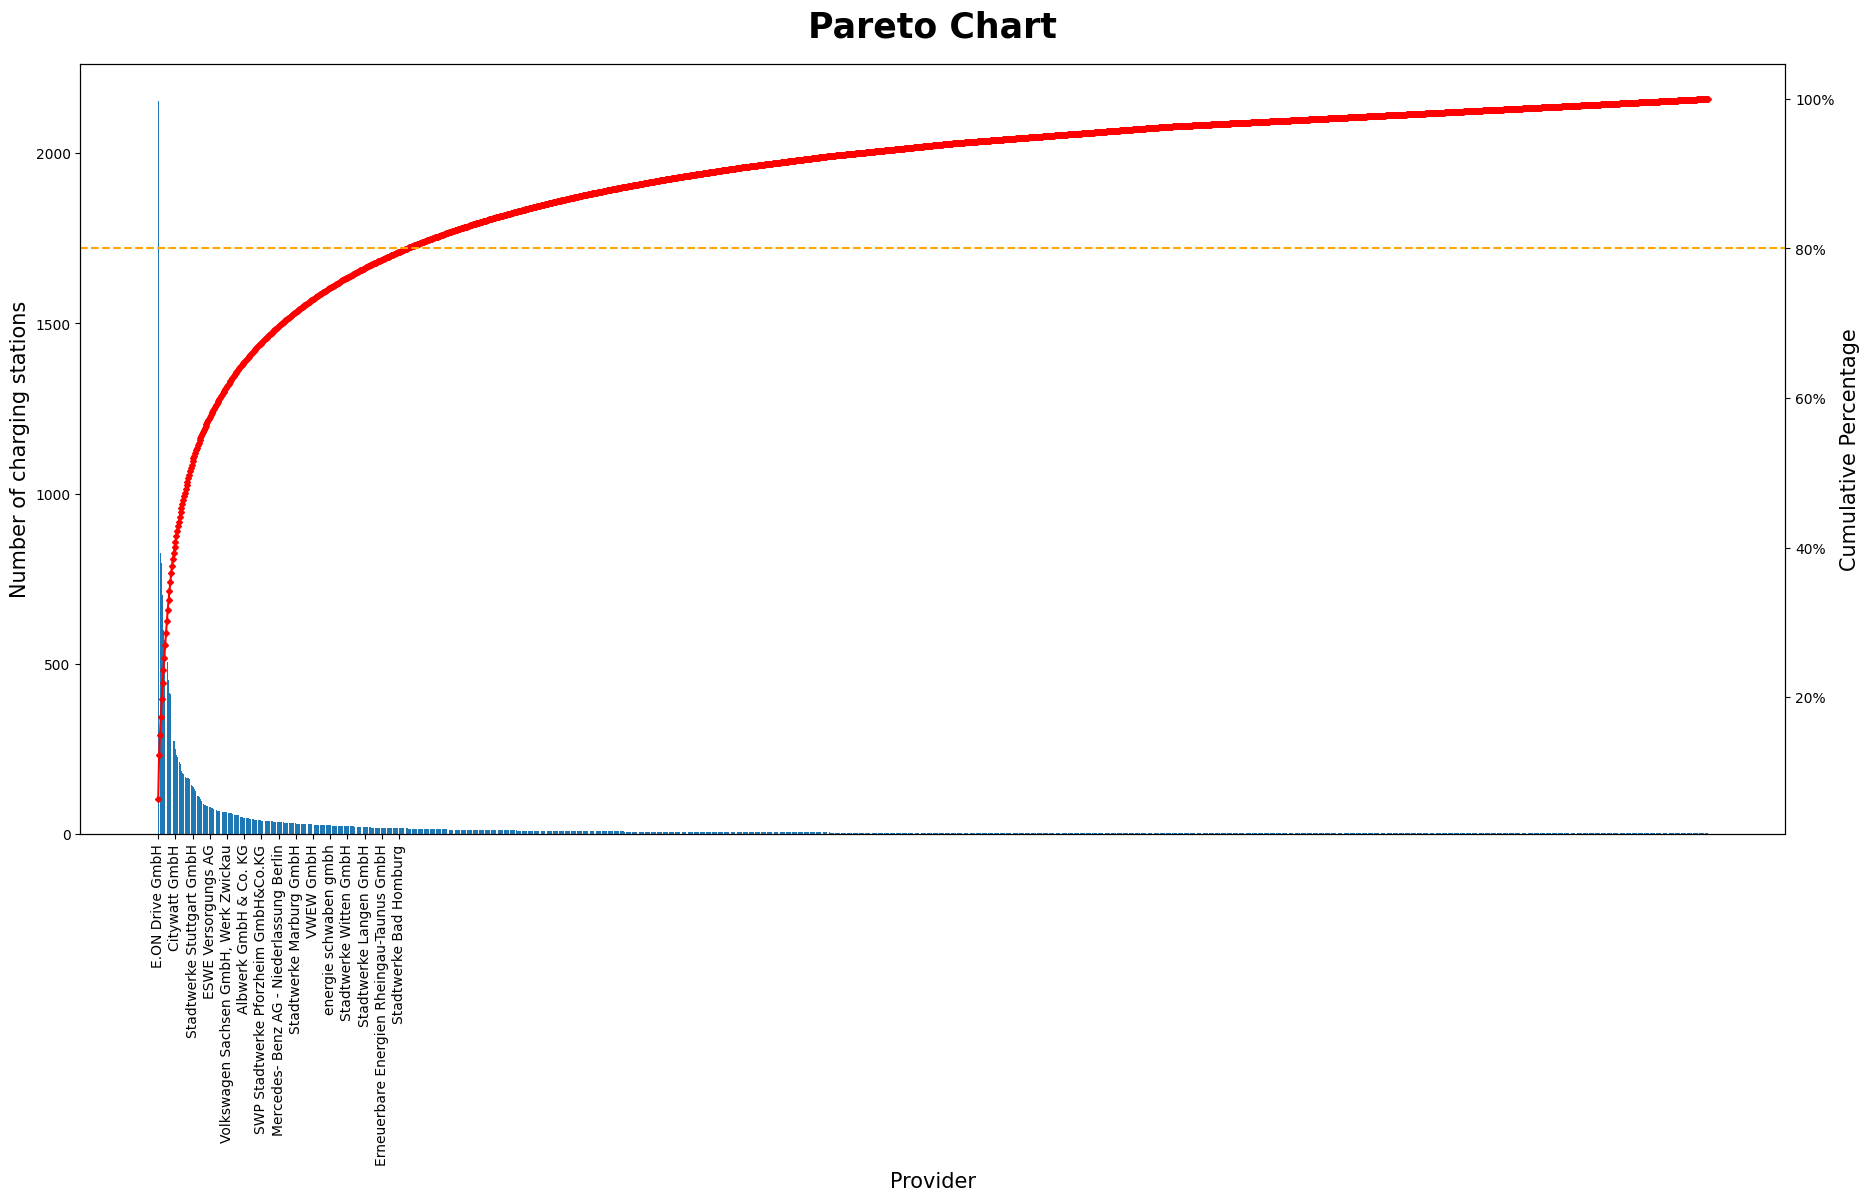

In [89]:
#Plot the chart

# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(cleanOfOne_df.index, cleanOfOne_df["ladepunkte"])
ax.set_title("Pareto Chart",fontdict={"fontweight":"bold","fontsize":25},pad=20)
ax.set_xlabel("Provider",fontdict={"fontsize":15})
#plt.xticks(visible=False) #if I don't want to see the x values
plt.xticks(rotation=90)
ax.set(xticks=([0,20,40,60,80,100,120,140,160,180,200,220,240,260,280])) # indexes
ax.set_ylabel("Number of charging stations",fontdict={"fontsize":15})

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(cleanOfOne_df.index, cleanOfOne_df["cum_percentage"], color="red", marker="D", ms=3)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage",fontdict={"fontsize":15})